In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
parks = gpd.read_file('../data/Metro_Parks_Boundaries(GIS).geojson')

In [3]:
print(parks.crs)
parks.head( )

epsg:4326


,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry
0,69.86,Harpeth River Park,1988,Harpeth River,PARK,7820 Coley Davis Rd,-86.9592214,36.07738249,Harpeth River State Park has much historical a...,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ..."
1,9.88,Harpeth Knoll Park,1972,Harpeth Knoll,PARK,708 Goodpasture Terrace,-86.93815537,36.05942777,"Huge grassy field with playground, and shade s...","MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ..."
2,17.14,Bellevue Park,1982,Red Caboose,PARK,656 Colice Jeanne Rd,-86.93354496,36.07159731,"Bellevue Park, known as Red Caboose Park, is p...","MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ..."
3,809.59,Bells Bend Park,2007,Bells Bend,PARK,4187 Old Hickory Blvd,-86.92646294,36.15016925,"Located in western Davidson County, this park ...","MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ..."
4,2168.792,Alvin G. Beaman Park,1996,Beaman,PARK,5911 Old Hickory Blvd.,-86.91984207,36.26075833,Beaman Park provides education and awareness p...,"MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ..."


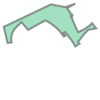

In [4]:
parks.loc[0, 'geometry']

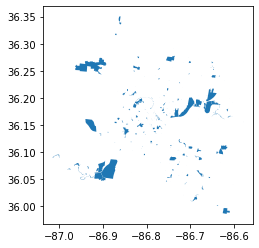

In [5]:
parks.plot();

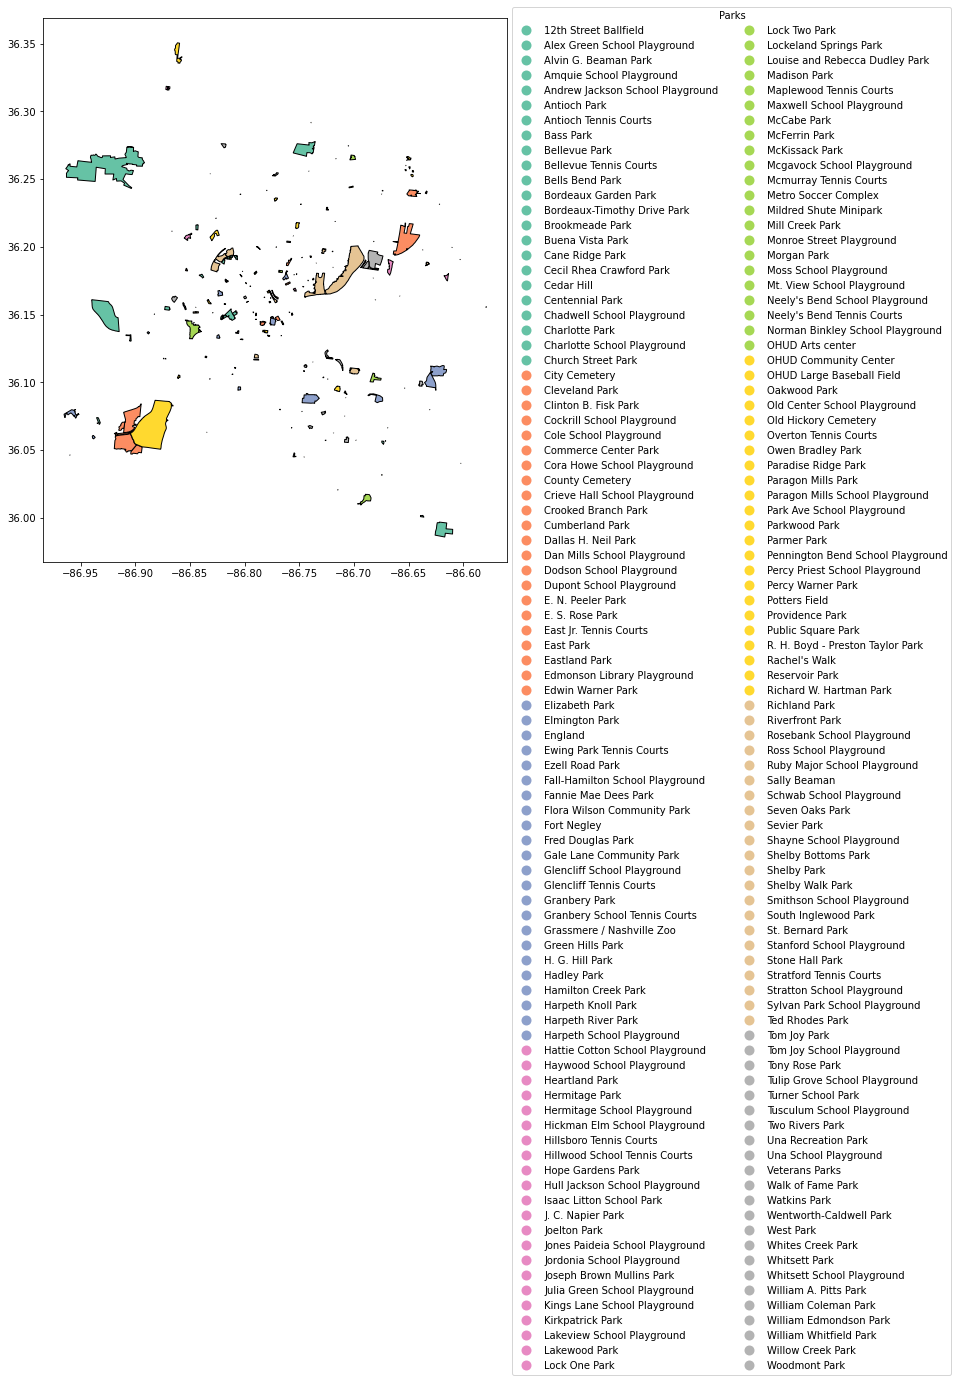

In [6]:
leg_kwds = {'title': 'Parks', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

parks.plot(column = 'name', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [7]:
bike_racks = pd.read_csv('../data/BikeRacks.csv')
print(bike_racks.shape)
bike_racks.head(3)

(426, 13)


,the_geom,Type,OBJECTID,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle
0,POINT (-86.65545277788499 36.049927777764),Rack,1,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept
1,POINT (-86.63406252260494 36.185280037810095),Rack,2,Public,Existing,114,2,Greenway,4,-86.634063,36.185280,Stones River Greenway - Donelson/Hermitage Area,Health Dept
2,POINT (-86.62067056966654 36.1584215986261),Rack,3,Public,Proposed,256,0,Park/Greenway,0,-86.620671,36.158422,"Percy Priest Reservoir, Stones River Greenway",Health Dept


In [8]:
bike_racks['the_geom'] = bike_racks.apply(lambda x: Point((x.LON, 
                                                         x.LAT)), 
                                        axis=1)
bike_racks.head(3)

,the_geom,Type,OBJECTID,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle
0,POINT (-86.65545278 36.04992778),Rack,1,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept
1,POINT (-86.63406252 36.18528004),Rack,2,Public,Existing,114,2,Greenway,4,-86.634063,36.185280,Stones River Greenway - Donelson/Hermitage Area,Health Dept
2,POINT (-86.62067057 36.1584216),Rack,3,Public,Proposed,256,0,Park/Greenway,0,-86.620671,36.158422,"Percy Priest Reservoir, Stones River Greenway",Health Dept


In [9]:
parks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
bike_racks_geo = gpd.GeoDataFrame(bike_racks, 
                           crs = parks.crs, 
                           geometry = bike_racks['the_geom'])

In [11]:
type(bike_racks_geo)

geopandas.geodataframe.GeoDataFrame

In [12]:
bike_racks_by_parks = gpd.sjoin(bike_racks_geo, parks, op = 'within')

In [13]:
bike_racks_by_parks.head(5)

,the_geom,Type,OBJECTID,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,...,index_right,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio
1,POINT (-86.63406252 36.18528004),Rack,2,Public,Existing,114,2,Greenway,4,-86.634063,...,270,3.56185329675,None,2003,Stones River Greenway - Lebanon Pk to Dam,GW,2330 Jackson Downs Blvd,0,0,None
3,POINT (-86.68652593 36.18754669),Rack,4,Public,Existing,115,1,Park/Greenway,5,-86.686526,...,91,374.3,Two Rivers Park,1966,Two Rivers,PARK,3150 McGavock Pike,-86.68238556,36.18991124,Two Rivers Park is a huge park featuring many ...
405,POINT (-86.68753042 36.18726518),Rack,410,Public,Future Artistic,431,0,Park,0,-86.687530,...,91,374.3,Two Rivers Park,1966,Two Rivers,PARK,3150 McGavock Pike,-86.68238556,36.18991124,Two Rivers Park is a huge park featuring many ...
4,POINT (-86.76218007999999 36.17245541),Rack,5,Public,Existing,103,3,Park/Community Center,15,-86.762180,...,70,10.65,East Park,1916,East Park,PARK,700 Woodland St,-86.76041451,36.17287486,"East Park has a great community center, playgr..."
389,POINT (-86.75871968 36.17401627),Rack,394,Public,Future Artistic,415,0,Park,0,-86.758720,...,70,10.65,East Park,1916,East Park,PARK,700 Woodland St,-86.76041451,36.17287486,"East Park has a great community center, playgr..."


In [14]:
bike_racks_by_parks['common_nam'].value_counts()

McCabe           7
Public Square    5
Buena Vista      5
Centennial       4
Hadley           4
                ..
Fort Negley      1
Seven Oaks       1
Paragon Mills    1
Harpeth River    1
Bicentennial     1
Name: common_nam, Length: 67, dtype: int64

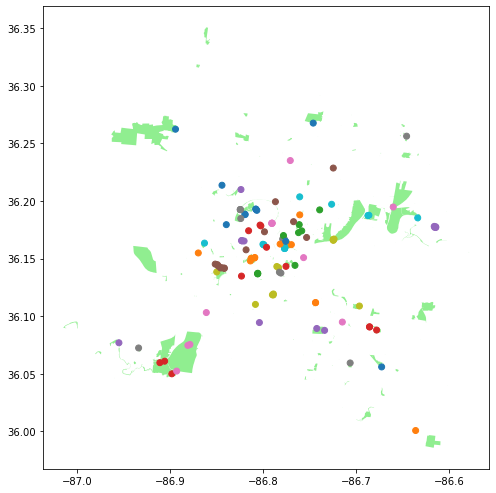

In [15]:
ax = parks.plot(figsize = (8, 10), color = 'lightgreen')
bike_racks_by_parks.plot( ax = ax, column = 'common_nam');
plt.show();

In [16]:
bike_racks_by_parks.geometry.centroid.head()

C:\Users\heath\AppData\Local\Temp\ipykernel_12504\1018622284.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bike_racks_by_parks.geometry.centroid.head()


1      POINT (-86.63406 36.18528)
3      POINT (-86.68653 36.18755)
405    POINT (-86.68753 36.18727)
4      POINT (-86.76218 36.17246)
389    POINT (-86.75872 36.17402)
dtype: geometry

In [17]:
center = bike_racks_by_parks.geometry.centroid[392]
print(center)

POINT (-86.90606456 36.06086309)


C:\Users\heath\AppData\Local\Temp\ipykernel_12504\4284896488.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = bike_racks_by_parks.geometry.centroid[392]


In [18]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.06086309, -86.90606456]


In [19]:
#create our map of Nashville Zip Code 37207 and show it
map_parks = folium.Map(location =  area_center, zoom_start = 12)
map_parks

In [20]:
i = 0
for row_index, row_values in bike_racks_by_parks.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 1
values are:
 
the_geom                      POINT (-86.63406252 36.18528004)
Type                                                      Rack
OBJECTID                                                     2
Domain                                                  Public
Status                                                Existing
IDNumber                                                   114
Quantity                                                     2
Location                                              Greenway
Capacity                                                     4
LON                                                 -86.634063
LAT                                                   36.18528
Detail_Loc     Stones River Greenway - Donelson/Hermitage Area
Data_Colle                                         Health Dept
geometry                      POINT (-86.63406252 36.18528004)
index_right                                                270
acres                         

In [24]:
bike_racks_by_parks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 124 entries, 1 to 409
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   the_geom     124 non-null    object  
 1   Type         124 non-null    object  
 2   OBJECTID     124 non-null    int64   
 3   Domain       124 non-null    object  
 4   Status       124 non-null    object  
 5   IDNumber     124 non-null    int64   
 6   Quantity     124 non-null    int64   
 7   Location     124 non-null    object  
 8   Capacity     124 non-null    int64   
 9   LON          124 non-null    float64 
 10  LAT          124 non-null    float64 
 11  Detail_Loc   124 non-null    object  
 12  Data_Colle   124 non-null    object  
 13  geometry     124 non-null    geometry
 14  index_right  124 non-null    int64   
 15  acres        124 non-null    object  
 16  name         121 non-null    object  
 17  year_estab   124 non-null    object  
 18  common_nam   124 non-n

In [25]:
#draw our parks areas
map_parks = folium.Map(location =  area_center, zoom_start = 12)
folium.GeoJson(parks).add_to(map_parks)

#iterate through bike_racks_by_parks to create locations and markers 
#for each bike rack
#remember for Folium locations, lat is listed first!!

for row_index, row_values in bike_racks_by_parks.iterrows():
    loc = [row_values['LAT'], row_values['LON']]
    pop = str(row_values['common_nam'])
    icon=folium.Icon(color="blue",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_parks)
map_parks.save('../maps/mapparks.html')

#display our map
map_parks